In [8]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import seaborn as sns
import matplotlib.pyplot as plt

model = read_sbml_model('Models/iML1515.xml')

# Print all the reactions involving extra-cellular L-aspartate
for reaction in model.metabolites.asp__L_e.reactions:
    print(reaction.id, reaction, reaction.name)


# Set the objective function for the biomass model
model.objective= 'BIOMASS_Ec_iML1515_core_75p37M' 
model_ojective_value = print (model.optimize().objective_value)


#set the optimal value for biomass to 100%
model.reactions.BIOMASS_Ec_iML1515_core_75p37M.upper_bound=0.873920
#set the lower bound to not be less than 75 % of the optimal value
model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound=0.873920*0.75
#print the new objective value
model_BM_optimized = print(model.optimize().objective_value)


# Setting a new objective function based on L-asp production rate
with model:
    model.objective = model.reactions.EX_asp__L_e
    model_asp_optimized = print (model.optimize().objective_value)



EX_asp__L_e EX_asp__L_e: asp__L_e -->  L-Aspartate exchange
ASPtex ASPtex: asp__L_e <=> asp__L_p L-aspartate transport via diffusion (extracellular to periplasm)
0.87699721425716
0.87392
4.596027557488181


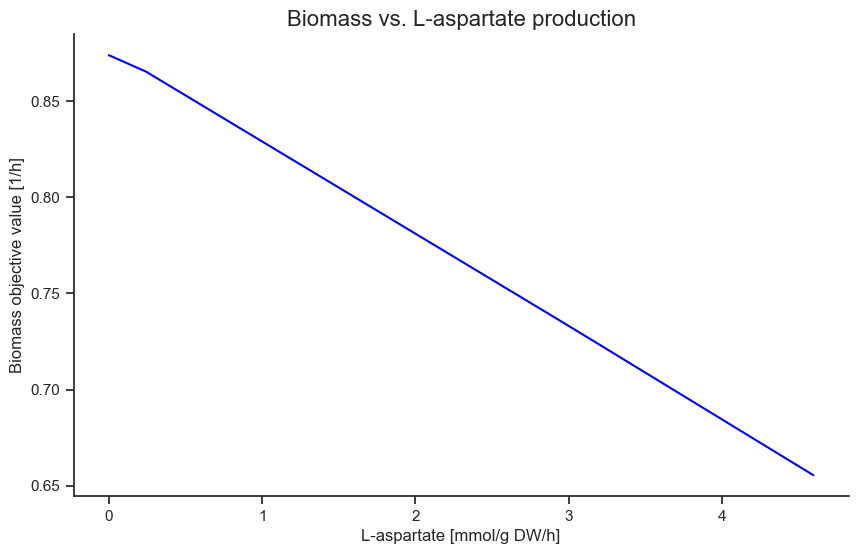

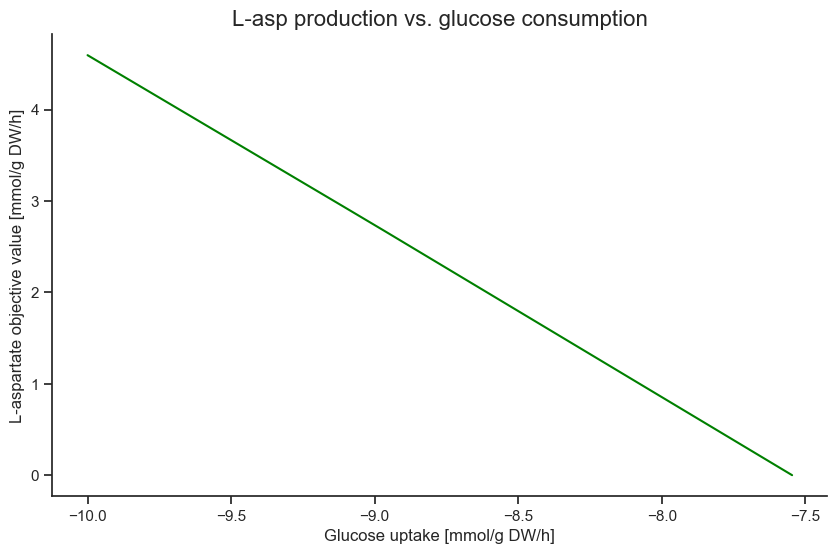

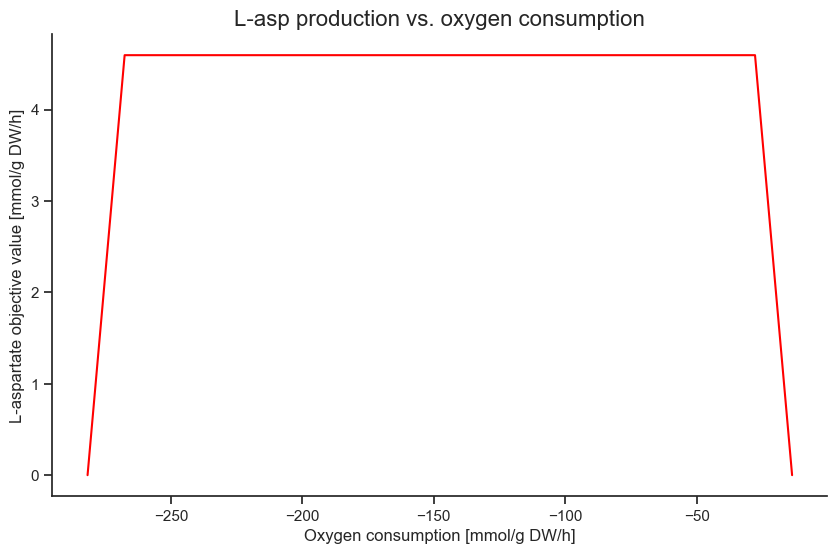

In [9]:
# Set the aesthetic style of the plots
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", context="notebook")

medium = model.medium
with model:
    model.medium = medium
    model.objective = model.reactions.EX_asp__L_e
    asp_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model, reactions=[model.reactions.EX_asp__L_e], objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_asp = production_envelope(model, reactions=[model.reactions.EX_glc__D_e], objective=model.reactions.EX_asp__L_e)
    ppp_o2 = production_envelope(model, reactions=[model.reactions.EX_o2_e], objective=model.reactions.EX_asp__L_e)


# Plot with Seaborn, given that ppp_BIOMASS, ppp_asp, and ppp_o2 are pandas DataFrames
def plot_seaborn(df, x, y, title, xlabel, ylabel, color):
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df, x=x, y=y, color=color)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    sns.despine()  # Despine the plot for a cleaner look
    plt.show()

# Plot the figures
plot_seaborn(ppp_BIOMASS, 'EX_asp__L_e', 'flux_maximum', 'Biomass vs. L-aspartate production', 'L-aspartate [mmol/g DW/h]', 'Biomass objective value [1/h]', 'blue')
plot_seaborn(ppp_asp, 'EX_glc__D_e', 'flux_maximum', 'L-asp production vs. glucose consumption', 'Glucose uptake [mmol/g DW/h]', 'L-aspartate objective value [mmol/g DW/h]', 'green')
plot_seaborn(ppp_o2, 'EX_o2_e', 'flux_maximum', 'L-asp production vs. oxygen consumption', 'Oxygen consumption [mmol/g DW/h]', 'L-aspartate objective value [mmol/g DW/h]', 'red')


## Let's look what happens when we change the sugar source!

In [10]:
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_succ_e'] = 10
    model.medium = medium
    solution = model.optimize()
    print(solution.fluxes['EX_asp__L_e'])

   

-4.689887559800871


C:\Users\criss\AppData\Roaming\Python\Python310\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [11]:
model.medium


{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}